# CIDDS Client Logs
###### Importing the required modules for the preprocessing and ignoring all warnings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings


warnings.filterwarnings('ignore')

###### Reading the first dataframe (Week 1) and understanding the structure

In [3]:
df1 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_1.csv")
pd.set_option('display.max_columns', None)

print(df1.head(20))
print(df1.describe())
print(df1[df1["class"].isin(["attacker"])])

            Date first seen  Duration  Proto     Src IP Addr  Src Pt  \
0   2017-03-15 00:01:16.632     0.000  TCP     192.168.100.5     445   
1   2017-03-15 00:01:16.552     0.000  TCP     192.168.100.5     445   
2   2017-03-15 00:01:16.551     0.004  TCP    192.168.220.15   48888   
3   2017-03-15 00:01:16.631     0.004  TCP    192.168.220.16   58844   
4   2017-03-15 00:01:16.552     0.000  TCP     192.168.100.5     445   
5   2017-03-15 00:01:16.631     0.004  TCP    192.168.220.16   58844   
6   2017-03-15 00:01:17.432     0.000  TCP     192.168.220.9   37884   
7   2017-03-15 00:01:17.431     0.000  TCP     192.168.100.5     445   
8   2017-03-15 00:01:17.432     0.000  TCP     192.168.220.9   37884   
9   2017-03-15 00:01:17.776     0.000  TCP          10000_35     443   
10  2017-03-15 00:01:17.782     0.000  TCP          10000_35     443   
11  2017-03-15 00:01:17.777     0.000  TCP          10000_35     443   
12  2017-03-15 00:01:17.749     0.082  TCP          10000_35    

###### Converting Date first seen into a recognisable datetime format and seeing change of flow rate

          Date first seen  Duration  Proto     Src IP Addr  Src Pt  \
0 2017-03-15 00:01:16.632     0.000  TCP     192.168.100.5     445   
1 2017-03-15 00:01:16.552     0.000  TCP     192.168.100.5     445   
2 2017-03-15 00:01:16.551     0.004  TCP    192.168.220.15   48888   
3 2017-03-15 00:01:16.631     0.004  TCP    192.168.220.16   58844   
4 2017-03-15 00:01:16.552     0.000  TCP     192.168.100.5     445   

      Dst IP Addr   Dst Pt  Packets     Bytes  Flows   Flags  Tos   class  \
0  192.168.220.16  58844.0        1       108      1  .AP...    0  normal   
1  192.168.220.15  48888.0        1       108      1  .AP...    0  normal   
2   192.168.100.5    445.0        2       174      1  .AP...    0  normal   
3   192.168.100.5    445.0        2       174      1  .AP...    0  normal   
4  192.168.220.15  48888.0        1       108      1  .AP...    0  normal   

  attackType attackID attackDescription  
0        ---      ---               ---  
1        ---      ---           

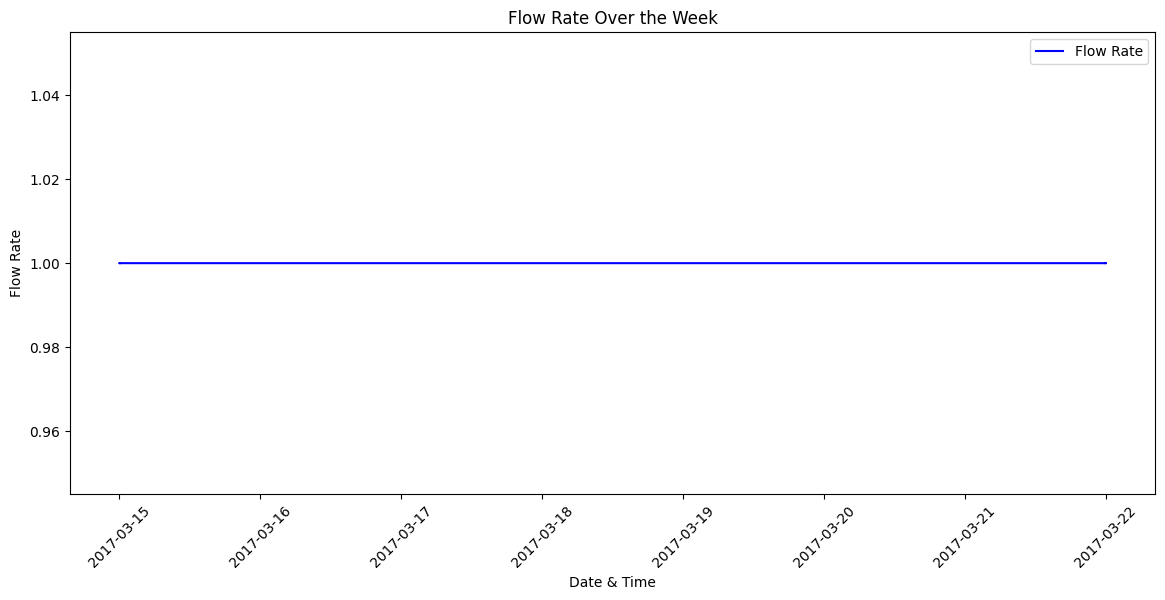

In [4]:
df1['Date first seen'] = pd.to_datetime(df1['Date first seen'])

plt.figure(figsize=(14, 6))
plt.plot(df1['Date first seen'], df1['Flows'], color='blue', label='Flow Rate')
print(df1.head())
plt.xlabel('Date & Time')
plt.ylabel('Flow Rate')
plt.title('Flow Rate Over the Week')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


###### Reading DataFrames Week 2,3,4

In [6]:
df2 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_2.csv")

In [7]:
df3 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_3.csv")

In [8]:
df4 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS_int_4.csv")

In [9]:
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

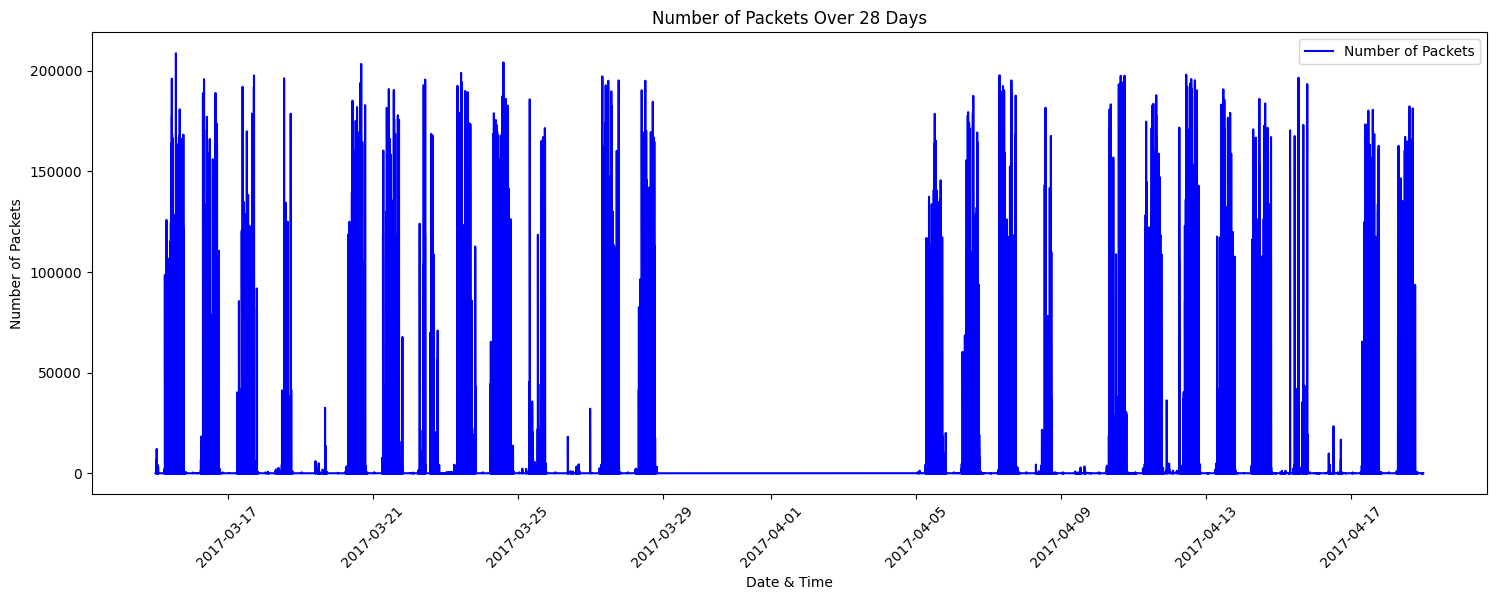

In [10]:
pd.set_option('display.max_columns', None)

df['Date first seen'] = pd.to_datetime(df['Date first seen'])

# Plot the number of packets for each second
plt.figure(figsize=(18, 6))
plt.plot(df['Date first seen'], df['Packets'], color='blue', label='Number of Packets')

plt.xlabel('Date & Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets Over 28 Days')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [11]:
print(df.describe())

                     Date first seen      Duration        Src Pt  \
count                       31287933  3.128793e+07  3.128793e+07   
mean   2017-03-30 07:56:32.162324736  1.232569e-01  2.463138e+04   
min       2017-03-15 00:01:16.551000  0.000000e+00  0.000000e+00   
25%    2017-03-21 14:06:41.465999872  0.000000e+00  8.000000e+01   
50%    2017-03-25 18:16:49.377999872  0.000000e+00  8.082000e+03   
75%    2017-04-10 12:27:40.745999872  3.100000e-02  5.008000e+04   
max       2017-04-18 23:59:30.203000  2.380080e+02  6.553500e+04   
std                              NaN  8.024699e-01  2.509684e+04   

             Dst Pt       Packets       Flows           Tos  
count  3.128793e+07  3.128793e+07  31287933.0  3.128793e+07  
mean   2.441451e+04  1.535089e+01         1.0  9.817501e+00  
min    0.000000e+00  1.000000e+00         1.0  0.000000e+00  
25%    8.000000e+01  1.000000e+00         1.0  0.000000e+00  
50%    8.082000e+03  2.000000e+00         1.0  0.000000e+00  
75%    4.999600

In [12]:
df = pd.get_dummies(df, columns=['Proto'], prefix='Proto')

In [13]:
print(df.head())

          Date first seen  Duration     Src IP Addr  Src Pt     Dst IP Addr  \
0 2017-03-15 00:01:16.632     0.000   192.168.100.5     445  192.168.220.16   
1 2017-03-15 00:01:16.552     0.000   192.168.100.5     445  192.168.220.15   
2 2017-03-15 00:01:16.551     0.004  192.168.220.15   48888   192.168.100.5   
3 2017-03-15 00:01:16.631     0.004  192.168.220.16   58844   192.168.100.5   
4 2017-03-15 00:01:16.552     0.000   192.168.100.5     445  192.168.220.15   

    Dst Pt  Packets     Bytes  Flows   Flags  Tos   class attackType attackID  \
0  58844.0        1       108      1  .AP...    0  normal        ---      ---   
1  48888.0        1       108      1  .AP...    0  normal        ---      ---   
2    445.0        2       174      1  .AP...    0  normal        ---      ---   
3    445.0        2       174      1  .AP...    0  normal        ---      ---   
4  48888.0        1       108      1  .AP...    0  normal        ---      ---   

  attackDescription  Proto_ICMP   Prot

In [14]:
protocol_columns = [col for col in df.columns if 'Proto_' in col]
df[protocol_columns] = df[protocol_columns].astype(int)
print(df.head())

          Date first seen  Duration     Src IP Addr  Src Pt     Dst IP Addr  \
0 2017-03-15 00:01:16.632     0.000   192.168.100.5     445  192.168.220.16   
1 2017-03-15 00:01:16.552     0.000   192.168.100.5     445  192.168.220.15   
2 2017-03-15 00:01:16.551     0.004  192.168.220.15   48888   192.168.100.5   
3 2017-03-15 00:01:16.631     0.004  192.168.220.16   58844   192.168.100.5   
4 2017-03-15 00:01:16.552     0.000   192.168.100.5     445  192.168.220.15   

    Dst Pt  Packets     Bytes  Flows   Flags  Tos   class attackType attackID  \
0  58844.0        1       108      1  .AP...    0  normal        ---      ---   
1  48888.0        1       108      1  .AP...    0  normal        ---      ---   
2    445.0        2       174      1  .AP...    0  normal        ---      ---   
3    445.0        2       174      1  .AP...    0  normal        ---      ---   
4  48888.0        1       108      1  .AP...    0  normal        ---      ---   

  attackDescription  Proto_ICMP   Prot

In [15]:
df.columns.values.tolist()

['Date first seen',
 'Duration',
 'Src IP Addr',
 'Src Pt',
 'Dst IP Addr',
 'Dst Pt',
 'Packets',
 'Bytes',
 'Flows',
 'Flags',
 'Tos',
 'class',
 'attackType',
 'attackID',
 'attackDescription',
 'Proto_ICMP ',
 'Proto_IGMP ',
 'Proto_TCP  ',
 'Proto_UDP  ']

In [16]:
print(df.isnull().sum())

Date first seen      0
Duration             0
Src IP Addr          0
Src Pt               0
Dst IP Addr          0
Dst Pt               0
Packets              0
Bytes                0
Flows                0
Flags                0
Tos                  0
class                0
attackType           0
attackID             0
attackDescription    0
Proto_ICMP           0
Proto_IGMP           0
Proto_TCP            0
Proto_UDP            0
dtype: int64


In [17]:
df.describe()

,Date first seen,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP
count,31287933,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,31287933.0,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07
mean,2017-03-30 07:56:32.162324736,1.232569e-01,2.463138e+04,2.441451e+04,1.535089e+01,1.0,9.817501e+00,5.342315e-04,2.860528e-05,8.636796e-01,1.357576e-01
min,2017-03-15 00:01:16.551000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-03-21 14:06:41.465999872,0.000000e+00,8.000000e+01,8.000000e+01,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2017-03-25 18:16:49.377999872,0.000000e+00,8.082000e+03,8.082000e+03,2.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2017-04-10 12:27:40.745999872,3.100000e-02,5.008000e+04,4.999600e+04,3.000000e+00,1.0,3.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,2017-04-18 23:59:30.203000,2.380080e+02,6.553500e+04,6.553500e+04,2.087680e+05,1.0,1.920000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,NaN,8.024699e-01,2.509684e+04,2.509105e+04,9.847063e+02,0.0,1.504512e+01,2.310727e-02,5.348314e-03,3.431285e-01,3.425310e-01


In [18]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP
0,2017-03-15 00:01:16.632,0.000,192.168.100.5,445,192.168.220.16,58844.0,1,108,1,.AP...,0,normal,---,---,---,0,0,1,0
1,2017-03-15 00:01:16.552,0.000,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---,0,0,1,0
2,2017-03-15 00:01:16.551,0.004,192.168.220.15,48888,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---,0,0,1,0
3,2017-03-15 00:01:16.631,0.004,192.168.220.16,58844,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---,0,0,1,0
4,2017-03-15 00:01:16.552,0.000,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,2017-04-18 23:59:30.175,0.000,DNS,53,192.168.200.8,54577.0,1,128,1,......,0,normal,---,---,---,0,0,0,1
31287929,2017-04-18 23:59:30.203,0.083,10068_66,443,192.168.200.8,58432.0,13,2304,1,.AP.S.,32,normal,---,---,---,0,0,1,0
31287930,2017-04-18 23:59:30.173,0.000,192.168.200.8,62120,DNS,53.0,1,87,1,......,0,normal,---,---,---,0,0,0,1
31287931,2017-04-18 23:59:30.173,0.000,192.168.200.8,54577,DNS,53.0,1,87,1,......,0,normal,---,---,---,0,0,0,1


In [20]:
df['Day of Week'] = df['Date first seen'].dt.day_name()
df['Hour of Day'] = df['Date first seen'].dt.hour

In [21]:
df[df['Day of Week'].isnull()]

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
def convert_to_numeric(value):
    multipliers = {'K': 1e3, 'M': 1e6, 'G': 1e9}
    if isinstance(value, str):
        suffix = value[-1]
        if suffix in multipliers:
            return float(value[:-1]) * multipliers[suffix]
    return float(value)

df['Bytes'] = df['Bytes'].apply(convert_to_numeric)
scaler = StandardScaler()
df['Bytes_Transf'] = scaler.fit_transform(df[['Bytes']])

In [24]:
df['Avg Packet Size'] = df['Bytes'] / df['Packets']

In [27]:
scaler = StandardScaler()
columns_to_normalize = ['Duration', 'Packets']
df['Duration_Tranf'] = scaler.fit_transform(df[['Duration']])
df['Packets_Transf'] = scaler.fit_transform(df[['Packets']])

In [28]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf
0,2017-03-15 00:01:16.632,0.000,192.168.100.5,445,192.168.220.16,58844.0,1,108.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,108.000000,-0.153597,-0.014574
1,2017-03-15 00:01:16.552,0.000,192.168.100.5,445,192.168.220.15,48888.0,1,108.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,108.000000,-0.153597,-0.014574
2,2017-03-15 00:01:16.551,0.004,192.168.220.15,48888,192.168.100.5,445.0,2,174.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009285,87.000000,-0.148612,-0.013558
3,2017-03-15 00:01:16.631,0.004,192.168.220.16,58844,192.168.100.5,445.0,2,174.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009285,87.000000,-0.148612,-0.013558
4,2017-03-15 00:01:16.552,0.000,192.168.100.5,445,192.168.220.15,48888.0,1,108.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,-0.009317,108.000000,-0.153597,-0.014574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,2017-04-18 23:59:30.175,0.000,DNS,53,192.168.200.8,54577.0,1,128.0,1,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009307,128.000000,-0.153597,-0.014574
31287929,2017-04-18 23:59:30.203,0.083,10068_66,443,192.168.200.8,58432.0,13,2304.0,1,.AP.S.,32,normal,---,---,---,0,0,1,0,Tuesday,23,-0.008240,177.230769,-0.050166,-0.002387
31287930,2017-04-18 23:59:30.173,0.000,192.168.200.8,62120,DNS,53.0,1,87.0,1,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009327,87.000000,-0.153597,-0.014574
31287931,2017-04-18 23:59:30.173,0.000,192.168.200.8,54577,DNS,53.0,1,87.0,1,......,0,normal,---,---,---,0,0,0,1,Tuesday,23,-0.009327,87.000000,-0.153597,-0.014574


In [29]:
df["class"].value_counts()

class
normal      28051906
attacker     1656605
victim       1579422
Name: count, dtype: int64

In [30]:
df = df.drop('attackID', axis=1)
df = df.drop('attackDescription', axis=1)
df = df.drop('Src IP Addr', axis=1)
df = df.drop('Dst IP Addr', axis=1)
df = df.drop('Src Pt', axis=1)
df = df.drop('Dst Pt', axis=1)

In [31]:
df

,Date first seen,Duration,Packets,Bytes,Flows,Flags,Tos,class,attackType,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf
0,2017-03-15 00:01:16.632,0.000,1,108.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,-0.009317,108.000000,-0.153597,-0.014574
1,2017-03-15 00:01:16.552,0.000,1,108.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,-0.009317,108.000000,-0.153597,-0.014574
2,2017-03-15 00:01:16.551,0.004,2,174.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,-0.009285,87.000000,-0.148612,-0.013558
3,2017-03-15 00:01:16.631,0.004,2,174.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,-0.009285,87.000000,-0.148612,-0.013558
4,2017-03-15 00:01:16.552,0.000,1,108.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,-0.009317,108.000000,-0.153597,-0.014574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,2017-04-18 23:59:30.175,0.000,1,128.0,1,......,0,normal,---,0,0,0,1,Tuesday,23,-0.009307,128.000000,-0.153597,-0.014574
31287929,2017-04-18 23:59:30.203,0.083,13,2304.0,1,.AP.S.,32,normal,---,0,0,1,0,Tuesday,23,-0.008240,177.230769,-0.050166,-0.002387
31287930,2017-04-18 23:59:30.173,0.000,1,87.0,1,......,0,normal,---,0,0,0,1,Tuesday,23,-0.009327,87.000000,-0.153597,-0.014574
31287931,2017-04-18 23:59:30.173,0.000,1,87.0,1,......,0,normal,---,0,0,0,1,Tuesday,23,-0.009327,87.000000,-0.153597,-0.014574


In [32]:
df = df.drop('Date first seen', axis=1)
df = df.drop('Flows', axis=1)

In [ ]:
df.to_csv("C:\\Users\\Narayanakshay\\OneDrive\\Desktop\\NIDS\\CIDDS_Client.csv", index=False)